# Assignment: PhD/Industrial Course: Advanced Optimization Techniques for Energy Systems Planning & Operation


### Miguel Chang
### March 17, 2022


-----

## Getting started

The assignments are solved using the general programming language Julia, with all code appended within this Jupyter notebook.

In order to model and solve these assignments, the following Julia packages will be called:

In [1]:
using JuMP                          # Modelling package for mathematical optimization in Julia 
using HiGHS, Ipopt, Cbc             # Solvers: MILP and NLP solvers.
using BilevelJuMP                   # Modelling package for bilevel problems
using MultiJuMP                     # Modelling package for multi-objective optimization
using Metaheuristics                # Package for metaheuristic algorithms
using Plots                         # Plotting package
# using GAMS                         # calls GAMS solvers, provided that the environment path for GAMS is specified below: 
# set_optimizer_attribute(model, GAMS.SysDir(), "C:\\GAMS\\38")   # if using GAMS, the environment path must be set.


(process:4088): GLib-GIO-WARNING **: 16:44:46.526: Unexpectedly, UWP app `37309CoolLeGetInc.GIMPFreeVersionForStore_3.2.24.0_x86__g0y9d13zmhd68' (AUMId `37309CoolLeGetInc.GIMPFreeVersionForStore_g0y9d13zmhd68!App') supports 179 extensions but has no verbs


---
## Exercise 1

In [2]:
ex1 = Model(HiGHS.Optimizer)

@variable(ex1, x1 >= 0)
@variable(ex1, x2 >= 0)

@objective(ex1, Min, -x1 + 3x2)

@constraint(ex1, c1, x1 + 4x2  <= 4)
@constraint(ex1, c2, -x1 + x2  >= 1)
@constraint(ex1, c3, 4x1 - 3x2  <= 12)
@constraint(ex1, c4, x1 + 2x2  <= 6)

print(ex1)

To plot the feasible regions, the inequality contrains are represented as line functions:

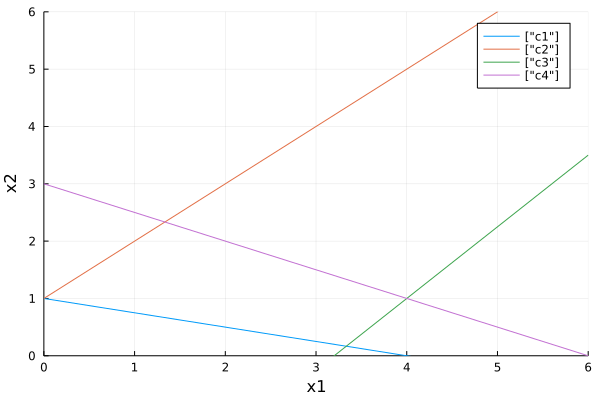

In [3]:
# Converting the inequalities to slope-intercept form, for graphing.
f1(x) = -0.25 * x + 1
f2(x) = x + 1
f3(x) = 1.25 * x - 4
f4(x) = -0.5 * x + 3

# Plotting the system:
plot(f1, xlims=(0,6), ylims=(0,6),xlabel="x1", ylabel="x2", label = ["c1"])
plot!(f2, label = ["c2"])
plot!(f3, label = ["c3"])
plot!(f4, label = ["c4"])

The feasible region is the area enclosed between the linear inequalities. Here it can be seen that the optimal values for x1 and x2 will be found at the interception of the lines, eg. [x1 = 0, x2 = 1]. This is result is validated when running the solver (see below):

In [4]:
optimize!(ex1)
solution_summary(ex1, verbose=true)


Presolving model
3 rows, 2 cols, 6 nonzeros
3 rows, 2 cols, 6 nonzeros
Presolve : Reductions: rows 3(-1); columns 2(-0); elements 6(-2)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -9.9999825897e-01 Ph1: 3(6); Du: 1(0.999998) 0s
          3     3.0000000000e+00 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 3
Objective value     :  3.0000000000e+00
HiGHS run time      :          0.00


* Solver : HiGHS

* Status
  Termination status : OPTIMAL
  Primal status      : FEASIBLE_POINT
  Dual status        : FEASIBLE_POINT
  Result count       : 1
  Has duals          : true
  Message from the solver:
  "kOptimal"

* Candidate solution
  Objective value      : 3.0
  Objective bound      : 0.0
  Dual objective value : 3.0
  Primal solution :
    x1 : 0.0
    x2 : 1.0
  Dual solution :
    c1 : 0.0
    c2 : 3.0
    c3 : 0.0
    c4 : 0.0

* Work counters
  Solve time (sec)   : 0.00100
  Barrier iterations : 3


---

## Exercise 2

The optimization problems is formulated as follows:

In [5]:
ex2 = Model(HiGHS.Optimizer)

@variable(ex2, x1 >= 0)
@variable(ex2, x2 >= 0)
@variable(ex2, x3 >= 0)
@variable(ex2, x4 >= 0)

@objective(ex2, Min, −4x1 − 2x2)

@constraint(ex2, c1, x1 + x2 + x3  == 5)
@constraint(ex2, c2, 2x1 + 0.5x2 + x4 == 8)
@constraint(ex2, c3, 4x1 - 3x2  <= 12)

print(ex2)

In [6]:
optimize!(ex2)
solution_summary(ex2, verbose=true)


Presolving model
3 rows, 4 cols, 8 nonzeros
3 rows, 4 cols, 8 nonzeros
Presolve : Reductions: rows 3(-0); columns 4(-0); elements 8(-0)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -5.9999815385e+00 Ph1: 3(5.5); Du: 2(5.99998) 0s
          2    -1.7333333333e+01 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 2
Objective value     : -1.7333333333e+01
HiGHS run time      :          0.00


* Solver : HiGHS

* Status
  Termination status : OPTIMAL
  Primal status      : FEASIBLE_POINT
  Dual status        : FEASIBLE_POINT
  Result count       : 1
  Has duals          : true
  Message from the solver:
  "kOptimal"

* Candidate solution
  Objective value      : -17.333333333333332
  Objective bound      : -17.333333333333332
  Dual objective value : -17.333333333333336
  Primal solution :
    x1 : 3.6666666666666665
    x2 : 1.3333333333333335
    x3 : 0.0
    x4 : 0.0
  Dual solution :
    c1 : -1.3333333333333335
    c2 : -1.3333333333333333
    c3 : 0.0

* Work counters
  Solve time (sec)   : 0.00099
  Barrier iterations : 2


As seen from the results, both the primal and dual objective values coincide.

---

## Exercise 3

In [7]:
ex3 = Model(HiGHS.Optimizer)

@variable(ex3, x1 >= 0)
@variable(ex3, x2 >= 0)
@variable(ex3, x3)
@variable(ex3, x4 <= 0)

@objective(ex3, Min, 3x1 + x2 - x4)

@constraint(ex3, c1, x1 + x2 - x3 - x4  == 4)
@constraint(ex3, c2, 2x1 - x2 + x4 <= 0)
@constraint(ex3, c3, 3x2 + x3 - 2x4  >= 1)

print(ex3)

In [8]:
optimize!(ex3)
solution_summary(ex3, verbose=true)


Presolving model
3 rows, 4 cols, 10 nonzeros
2 rows, 3 cols, 6 nonzeros
Presolve : Reductions: rows 2(-1); columns 3(-1); elements 6(-4)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 2(5); Du: 0(1.37078e-13) 0s
          2     1.2500000000e+00 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 2
Objective value     :  1.2500000000e+00
HiGHS run time      :          0.00


* Solver : HiGHS

* Status
  Termination status : OPTIMAL
  Primal status      : FEASIBLE_POINT
  Dual status        : FEASIBLE_POINT
  Result count       : 1
  Has duals          : true
  Message from the solver:
  "kOptimal"

* Candidate solution
  Objective value      : 1.25
  Objective bound      : 0.0
  Dual objective value : 1.25
  Primal solution :
    x1 : 0.0
    x2 : 1.25
    x3 : -2.75
    x4 : 0.0
  Dual solution :
    c1 : 0.25
    c2 : 0.0
    c3 : 0.25

* Work counters
  Solve time (sec)   : 0.00075
  Barrier iterations : 2


Indeed, as seen from the results, both the primal and dual objective values coincide.

---

## Exercise 4

In [9]:
ex4 = Model(HiGHS.Optimizer)

@variable(ex4, x11 >= 0)
@variable(ex4, x12 >= 0)
@variable(ex4, x13 >= 0)
@variable(ex4, x21 >= 0)
@variable(ex4, x22 >= 0)
@variable(ex4, x23 >= 0)

@objective(ex4, Max, x12 + x22 + x23)

@constraint(ex4, c1, x11 + x12 + x13  == 20)
@constraint(ex4, c2, x21 + x22 + x23 == 20)
@constraint(ex4, c3, -x11 - x21  == -20)
@constraint(ex4, c4, -x12 - x22  == -10)
@constraint(ex4, c5, -x13 - x23  == -10)
@constraint(ex4, c6, x11 + x23  <= 15)

print(ex4)

In [10]:
optimize!(ex4)
solution_summary(ex4, verbose=true)


Presolving model
3 rows, 3 cols, 8 nonzeros
1 rows, 2 cols, 2 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-6); columns 0(-6); elements 0(-14) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  1.7500000000e+01
HiGHS run time      :          0.00


* Solver : HiGHS

* Status
  Termination status : OPTIMAL
  Primal status      : FEASIBLE_POINT
  Dual status        : FEASIBLE_POINT
  Result count       : 1
  Has duals          : true
  Message from the solver:
  "kOptimal"

* Candidate solution
  Objective value      : 17.5
  Objective bound      : 17.5
  Dual objective value : 17.5
  Primal solution :
    x11 : 7.5
    x12 : 10.0
    x13 : 2.5
    x21 : 12.5
    x22 : 0.0
    x23 : 7.5
  Dual solution :
    c1 : 0.5
    c2 : -0.0
    c3 : -0.0
    c4 : 1.5
    c5 : 0.5
    c6 : -0.5

* Work counters
  Solve time (sec)   : 0.00100
  Barrier iterations : 0


---

## Exercise 5

When formulating this problem, the variables must be defined as integers:

In [11]:
ex5 = Model(HiGHS.Optimizer)

@variable(ex5, x1 >=0, Int)
@variable(ex5, x2 >=0, Int)

@objective(ex5, Max, 7x1 + 2x2)

@constraint(ex5, c1, -x1 + 2x2 <= 4)
@constraint(ex5, c2, 5x1 + x2 <= 20)
@constraint(ex5, c3, -2x1 - 2x2  >= -7)

print(ex5)

In [12]:
optimize!(ex5)
solution_summary(ex5, verbose=true)


Presolving model
2 rows, 2 cols, 4 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve: Optimal

Solving report
  Status            Optimal
  Primal bound      -21
  Dual bound        -21
  Solution status   feasible
                    21 (objective)
                    0 (bound viol.)
                    0 (int. viol.)
                    0 (row viol.)
  Timing            0.00 (total)
                    0.00 (presolve)
                    0.00 (postsolve)
  Nodes             0
  LP iterations     0 (total)
                    0 (strong br.)
                    0 (separation)
                    0 (heuristics)


* Solver : HiGHS

* Status
  Termination status : OPTIMAL
  Primal status      : FEASIBLE_POINT
  Dual status        : NO_SOLUTION
  Result count       : 1
  Has duals          : false
  Message from the solver:
  "kOptimal"

* Candidate solution
  Objective value      : 21.0
  Objective bound      : 21.0
  Primal solution :
    x1 : 3.0
    x2 : 0.0

* Work counters
  Solve time (sec)   : 0.00110
  Barrier iterations : 0


---

## Exercise 6

Considering that this problem is not linear, a new NLP solver is called. Likewise, the problem is formulated slightly different in the JuMP package.

In [13]:
ex6 = Model(Ipopt.Optimizer)

@variable(ex6, x1)
@variable(ex6, x2)

@NLobjective(ex6, Min, -x1 + x2 ^2)

@NLconstraint(ex6, c1, (1-x1)^3 - x2 >= 0)
@NLconstraint(ex6, c2, x1 + x2 -1 >= 0)

print(ex6)

Based on the inequality constrains the feasible region can be plotted as follows:

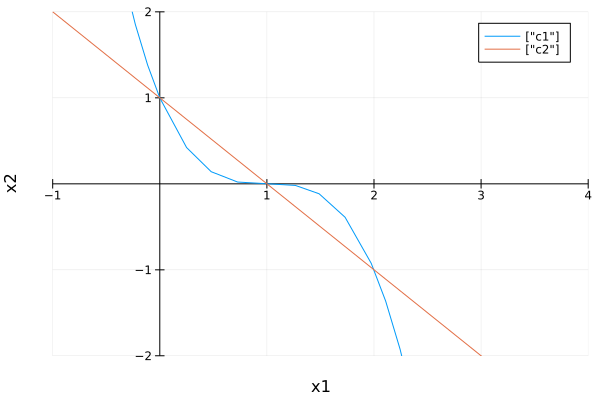

In [14]:
f1(x) = (1-x)^3
f2(x) = 1 - x

# Plotting the system:
plot(f1, xlims=(-1,4), ylims=(-2,2),xlabel="x1", ylabel="x2", label = ["c1"], framestyle = :origin)
plot!(f2, label = ["c2"])

In [15]:
optimize!(ex6)
solution_summary(ex6, verbose=true)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equal

* Solver : Ipopt

* Status
  Termination status : LOCALLY_SOLVED
  Primal status      : FEASIBLE_POINT
  Dual status        : FEASIBLE_POINT
  Result count       : 1
  Has duals          : true
  Message from the solver:
  "Solve_Succeeded"

* Candidate solution
  Objective value      : -1.5823559366148618
  Primal solution :
    x1 : 1.698827120896218
    x2 : -0.34127874865182584
  Dual solution :

* Work counters
  Solve time (sec)   : 1.53300


---

## Exercise 7

In this problem we formulate the upper and lower level problems applying the BilevelJuMP package. This is presented as follows:

In [16]:
ex7 = BilevelModel(Cbc.Optimizer, mode = BilevelJuMP.SOS1Mode())

@variable(Upper(ex7), x)
@variable(Lower(ex7), y)

@objective(Upper(ex7), Min, x + 3y)
@constraints(Upper(ex7), begin
    x <= 6
    x >= 1
end)

@objective(Lower(ex7), Min, -y)
@constraints(Lower(ex7), begin
     x + y <= 8
    x + 4y >= 8
    x + 2y <= 13
end)
optimize!(ex7)

Cbc3007W No integer variables - nothing to do
Presolve 0 (-9) rows, 0 (-8) columns and 0 (-20) elements
Optimal - objective value 6.25
After Postsolve, objective 6.25, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 6.25 - 0 iterations time 0.002, Presolve 0.00


┌ Warning: There are known correctness issues using Cbc with SOS constraints and no binary variables.
└ @ Cbc C:\Users\miguel\.julia\packages\Cbc\vMMGG\src\MOI_wrapper\MOI_wrapper.jl:716


In [17]:
@show objective_value(ex7) 
@show value(x) 
@show value(y);

objective_value(ex7) = 6.25
value(x) = 1.0
value(y) = 1.75


---

## Exercise 8

Similar to the previous exercise (6), this problem must be formulated as an NLP. Moreover, the MultiJuMP package has to be called to apply Multi-objective optimization.

In [18]:
ex8 = multi_model(Ipopt.Optimizer)

@variable(ex8, p[i=1:2])

@NLexpression(ex8, cost, 83 + 6.2p[1] + 0.021p[1]^2 + 120.75 + 7.5p[2] +0.045p[2]^2)
@NLexpression(ex8, env, 0.009p[1]^2 + 3.0p[1] + 12 + 0.005p[2]^2 + 3.89p[2] + 14)

@NLconstraint(ex8, p[1] + p[2] == 560)
@NLconstraint(ex8, p[1] >= 80)
@NLconstraint(ex8, p[1] <= 400)
@NLconstraint(ex8, p[2] >= 60)
@NLconstraint(ex8, p[2] <= 300)

obj1 = SingleObjective(cost) # sense = MOI.MIN_SENSE)
obj2 = SingleObjective(env)  #sense = MOI.MIN_SENSE) # MOI.MIN_SENSE)

md = get_multidata(ex8)
md.objectives = [obj1, obj2]
md.pointsperdim = 10
optimize!(ex8, method = EpsilonCons()) # or method = WeightedSum() or method = EpsilonCons()

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        4
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

LoadError: UndefVarError: NodeData not defined

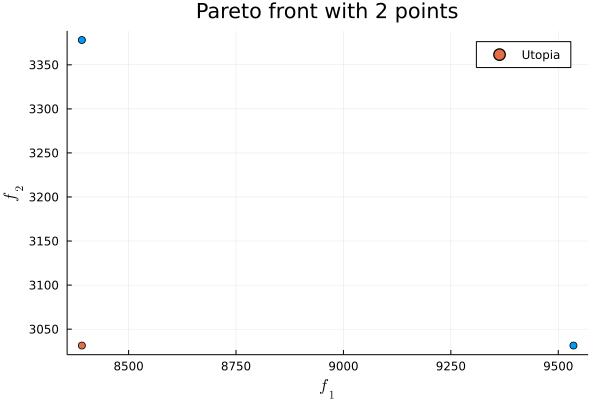

In [19]:
# Get the Utopia and Nadir points
utopiapoint = getutopia(md)

using Plots
pltnbi = plot(md)

scatter!(pltnbi,
    [utopiapoint[1]], [utopiapoint[2]],
    label="Utopia")

(Note: while the formulation is correct, there is some potentially conflicting issues in the package versioning)

---

## Exercise 9

Here, the problem is formulated slightly different applying the Metaheuristics package.

The problem is posed as follows:

In [20]:
function f(x) 
    x,y = x[1], x[2]
    
    fx = x^3 + y^3               # Objective function
    gx = [(-x - 5y);  (x^2 + y^2 - 2)]    # inequality constraints
    hx = [0.0]                       # inequality constraints
    
    return fx, gx, hx
end

bounds = [-2.0ones(2) 2.0ones(2)]'

2×2 adjoint(::Matrix{Float64}) with eltype Float64:
 -2.0  -2.0
  2.0   2.0

In [21]:
eca = ECA(N=100)
options = Options(seed=0, store_convergence = true)

result = optimize(f, bounds, ECA(N=500, options = options))

+=========== RESULT ==========+
  iteration: 40
    minimum: -2.64549
  minimizer: [-1.3867504902356749, 0.27735009899594787]
    f calls: 20000
  feasibles: 500 / 500 in final population
 total time: 2.2540 s
+============================+

Plotting the results then yields:

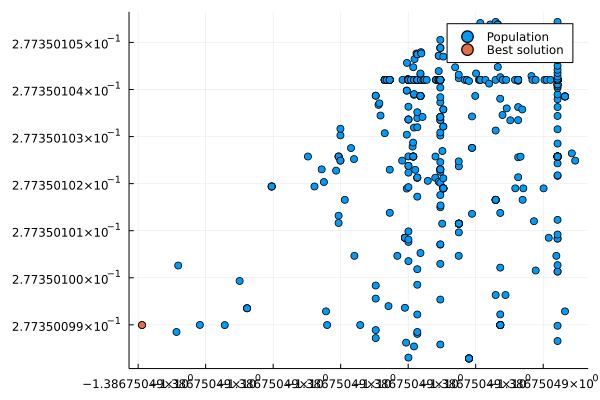

In [22]:
X = positions(result)
scatter(X[:,1], X[:,2], label="Population")

x = minimizer(result)
scatter!(x[1:1], x[2:2], label="Best solution")

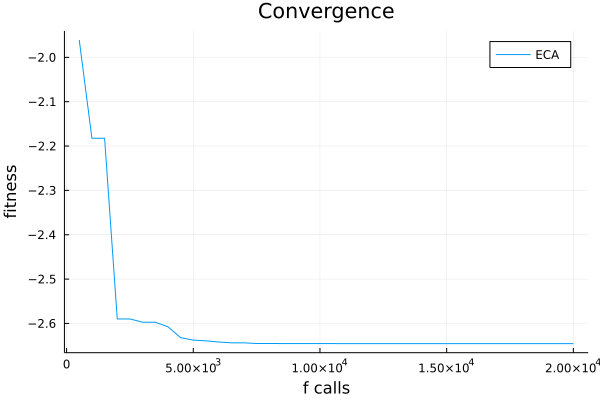

In [23]:
f_calls, best_f_value = convergence(result)

plot(xlabel="f calls", ylabel="fitness", title="Convergence")
plot!(f_calls, best_f_value, label="ECA")

---

## Exercise 10

In this exercise, the problem faced by a plant producer is modelled. This is first formulated as: 

$\textrm{maximize }  {\Pi}_{j}^{S} =  $

$0.096 * (24 * 4) ( 3 * 36P_{1}^{A} + 2 * 37P_{1}^{B} + 1 * 35P_{1}^{C} + 40P_{1}^{t1} + 41P_{1}^{t2} + 42P_{1}^{t3}) + $ 

$ 0.144 * (24 * 4) (3 * 36P_{2}^{A} + 2 * 37P_{2}^{B} + 1 * 35P_{2}^{C} + 40P_{2}^{t1} + 41P_{2}^{t2} + 43P_{2}^{t3}) + $ 

$ 0.144 * (24 * 4) (3 * 36P_{3}^{A} + 2 * 37P_{3}^{B} + 1 * 35P_{3}^{C} + 40P_{3}^{t1} + 39P_{3}^{t2} + 40P_{3}^{t3}) + $ 

$ 0.216 * (24 * 4) (3 * 36P_{4}^{A} + 2 * 37P_{4}^{B} + 1 * 35P_{4}^{C} + 40P_{4}^{t1} + 39P_{4}^{t2} + 41P_{4}^{t3}) + $ 

$ 0.064 * (24 * 4) (3 * 36P_{5}^{A} + 2 * 37P_{5}^{B} + 1 * 35P_{5}^{C} + 35P_{5}^{t1} + 36P_{5}^{t2} + 37P_{5}^{t3}) + $ 

$ 0.096 * (24 * 4) (3 * 36P_{6}^{A} + 2 * 37P_{6}^{B} + 1 * 35P_{6}^{C} + 35P_{6}^{t1} + 36P_{6}^{t2} + 35P_{6}^{t3}) + $ 

$ 0.096 * (24 * 4) (3 * 36P_{7}^{A} + 2 * 37P_{7}^{B} + 1 * 35P_{7}^{C} + 35P_{7}^{t1} + 34P_{7}^{t2} + 33P_{7}^{t3}) + $ 

$ 0.144 * (24 * 4) (3 * 36P_{8}^{A} + 2 * 37P_{8}^{B} + 1 * 35P_{8}^{C} + 35P_{8}^{t1} + 34P_{8}^{t2} + 32P_{8}^{t3}) $ 

$\textrm{subject to:  }$


$ P^{A} + P^{B} + P^{t1} <= 350$

$ P^{A} + P^{t2} <= 350$

$ P^{A} + P^{B} + P^{C} + P^{t3} <= 350$

$ 0 <= P^{t} $

$ 0 <= P^{a} <= 70$

$ 0 <= P^{b} <= 50$

$ 0 <= P^{c} <= 40$


$\textrm{where:}$

$\textrm{A, B , C, represent the contracts}$

$\textrm{t, presents one of three 4-day period}$

$\textrm{1 - 8, the potential different pool price scenarios}$


The first element in each line represent the probability values. Since each period is equivalent to 4 days, a conversion factor to hours is also added to the equation.

This can then be coded as follows:

In [24]:
prob = [0.096, 0.144, 0.144, 0.216, 0.064, 0.096, 0.096, 0.144]
t1 = [40, 40, 40, 40, 35, 35, 35, 35]
t2 = [41, 41, 39, 39, 36, 36, 34, 34]
t3 = [42, 43, 40, 41, 37, 35, 33, 32]


ex10 = Model(Ipopt.Optimizer)

@variable(ex10, p_a[i=1:8])
@variable(ex10, p_b[i=1:8])
@variable(ex10, p_c[i=1:8])
@variable(ex10, p_t1[i=1:8])
@variable(ex10, p_t2[i=1:8])
@variable(ex10, p_t3[i=1:8])

@objective(ex10, Max, sum(prob[i] * 24 * 4 * (3*36p_a[i] + 2*37p_b[i] + 35p_c[i] + t1[i]*p_t1[i] + t2[i]*p_t2[i] + t3[i]*p_t3[i]) for i=1:8))

@constraint(ex10, [i in 1:8], (p_a[i] + p_b[i] + p_t1[i]) <= 350)
@constraint(ex10, [i in 1:8], (p_a[i] + p_t2[i]) <= 350)
@constraint(ex10, [i in 1:8], (p_a[i] + p_b[i] + p_c[i] + p_t3[i]) <= 350)

@constraint(ex10, [i in 1:8], 0 <=(p_a[i]) <= 70)
@constraint(ex10, [i in 1:8], 0 <=(p_b[i]) <= 50)
@constraint(ex10, [i in 1:8], 0 <=(p_c[i]) <= 40)

@constraint(ex10, [i in 1:8], p_t1[i] >= 0)
@constraint(ex10, [i in 1:8], p_t2[i] >= 0)
@constraint(ex10, [i in 1:8], p_t3[i] >= 0)

print(ex10)

The solutions are then obtained as follows:

In [25]:
optimize!(ex10)
solution_summary(ex10, verbose=true)

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      144
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:       48
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       96
        inequality constraints with only lower bounds:       48
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       48

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

* Solver : Ipopt

* Status
  Termination status : LOCALLY_SOLVED
  Primal status      : FEASIBLE_POINT
  Dual status        : FEASIBLE_POINT
  Result count       : 1
  Has duals          : true
  Message from the solver:
  "Solve_Succeeded"

* Candidate solution
  Objective value      : 3.859630118609394e6
  Primal solution :
    p_a[1] : -9.594041589751417e-9
    p_a[2] : -9.74627647022082e-9
    p_a[3] : -9.630947067841736e-9
    p_a[4] : -9.774468051985928e-9
    p_a[5] : 47.22229715578103
    p_a[6] : 70.00000069695533
    p_a[7] : 70.0000006989851
    p_a[8] : 70.00000069942006
    p_b[1] : -9.238823746379877e-9
    p_b[2] : -9.548934533331781e-9
    p_b[3] : -9.32339968049338e-9
    p_b[4] : -9.613372803178287e-9
    p_b[5] : 50.00000049543284
    p_b[6] : 50.00000049847765
    p_b[7] : 50.0000004989851
    p_b[8] : 50.00000049942006
    p_c[1] : -9.13008208718077e-9
    p_c[2] : -9.492550652960388e-9
    p_c[3] : -9.188077323511427e-9
    p_c[4] : -9.548934296581731e-9
    p_c[5